### Predicting whether a sequence of heads or tails of length 20 was computer generated or human written
#### Neural Network:
##### Not expecting much because this problem requires looking at the whole sequence not just a piece
##### kinda stupid lol

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import util
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
X_train, y_train, X_test, y_test = util.load_nn_data()
print("X_train", X_train[:5])
print("y_train", y_train[:5])

X_train [[1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1]]
y_train [1 0 1 1 1]


In [3]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-16 10:18:22.350139: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-16 10:18:22.350359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
nn = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=20, batch_size=32)

Epoch 1/20


2023-01-16 10:18:22.511423: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/38 [..............................] - ETA: 18s - loss: 0.8091 - accuracy: 0.4062

2023-01-16 10:18:22.828342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 1s 15ms/step - loss: 0.7076 - accuracy: 0.5309 - val_loss: 0.6746 - val_accuracy: 0.6000
Epoch 2/20
 9/38 [======>.......................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5521

2023-01-16 10:18:23.478704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 0s 7ms/step - loss: 0.6836 - accuracy: 0.5746 - val_loss: 0.6664 - val_accuracy: 0.6222
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.6745 - accuracy: 0.6035 - val_loss: 0.6643 - val_accuracy: 0.6444
Epoch 4/20
38/38 [==============================] - 0s 7ms/step - loss: 0.6661 - accuracy: 0.6397 - val_loss: 0.6607 - val_accuracy: 0.6444
Epoch 5/20
38/38 [==============================] - 0s 8ms/step - loss: 0.6569 - accuracy: 0.6570 - val_loss: 0.6538 - val_accuracy: 0.6593
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 0.6472 - accuracy: 0.6620 - val_loss: 0.6529 - val_accuracy: 0.6519
Epoch 7/20
38/38 [==============================] - 0s 8ms/step - loss: 0.6372 - accuracy: 0.6925 - val_loss: 0.6436 - val_accuracy: 0.6519
Epoch 8/20
38/38 [==============================] - 0s 7ms/step - loss: 0.6264 - accuracy: 0.6950 - val_loss: 0.6388 - val_accuracy: 0.6593
Epoch 9/20
38/38 [=============

In [5]:
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(round(y_pred[i][0]))
pred = np.array(pred)

pred

5/5 [==============================] - 0s 4ms/step


2023-01-16 10:18:29.343065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1])

In [6]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 71.85185185185186


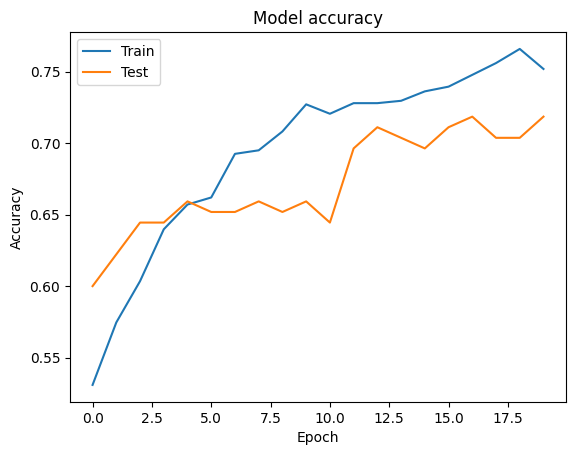

In [7]:
plt.plot(nn.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


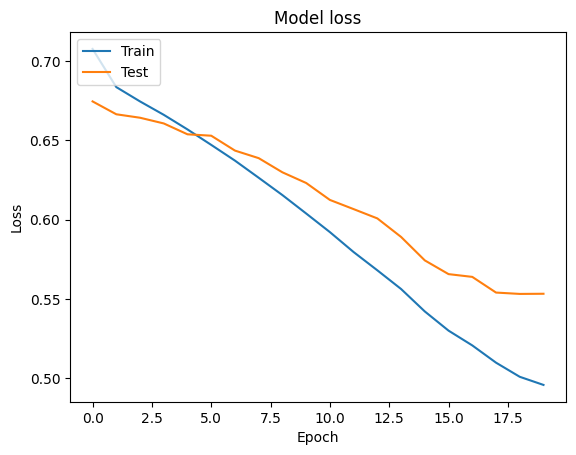

In [8]:
plt.plot(nn.history['loss']) 
plt.plot(nn.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [9]:
util.predict_nn(util.random_coinflip(),model)
util.predict_nn("hthththththththththt",model)

1/1 [==============================] - 0s 64ms/step
Model prediction of httthhttthththththhh: 0.516346% Computer
1/1 [==============================] - 0s 21ms/step
Model prediction of hthththththththththt: 0.911497% Human


In [10]:
model.save("./models/nn")

INFO:tensorflow:Assets written to: ./models/nn/assets
